# **Multiple Linear Regression**

Pada studi kasus analisis regresi linier berganda akan digunakan data dengan tiga variabel independen (X) TotalBsmtSF, LotArea dan MSSubClass, sedangkan variabel dependen (Y) Sale Price, dengan detail variabel seperti berikut :<br>
TotalBsmtSF : Total square feet of basement area <br>
LotArea : Lot size in square feet <br>
MSSubClass : Identifies the type of dwelling involved in the sale <br>

***Download DataCO2.csv, lakukan eksplorasi data dan preprocessing yang menurut anda
diperlukan***

***- Eksplorasi Data -***

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("C:/Users/ASUS/OneDrive/Documents\DataCO2.csv")
data

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [44]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro
import statsmodels.api as sm

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [45]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. 
# Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = "C:/Users/ASUS/OneDrive/Documents/"  

In [46]:
# Gabungkan path dengan nama file menggunakan os.path.join
file_path = os.path.join(path, "DataCO2.csv")

# Membaca dataset
data_Co2 = pd.read_csv(file_path, usecols=["Nama", "Model", "Volume", "Bobot", "CO2"])

# Menampilkan beberapa baris pertama
(data_Co2.head())

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


***- processing Data -***

Analisis data eksplorasi adalah pendekatan untuk merangkum karakteristik dari data. Data processing adalah proses mengonversi data menjadi informasi yang bermanfaat dan dapat digunakan sesuai dengan tujuan analisis.

In [47]:
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [48]:
(data.describe())

,Volume,Bobot,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [49]:
print(data.columns)

Index(['Nama', 'Model', 'Volume', 'Bobot', 'CO2'], dtype='object')


In [50]:
# Menampilkan nilai unik dalam setiap kolom untuk mencari nilai non-numerik
for column in data_Co2.columns:
    unique_values = data_Co2[column].unique()
    print(f"{column}: {unique_values[:10]}")  # Menampilkan 10 nilai unik pertama

Nama: ['Toyoty' 'Mitsubishi' 'Skoda' 'Fiat' 'Mini' 'VW' 'Mercedes' 'Ford' 'Audi'
 'Hyundai']
Model: ['Aygo' 'Space Star' 'Citigo' '500' 'Cooper' 'Up!' 'Fabia' 'A-Class'
 'Fiesta' 'A1']
Volume: [1000 1200  900 1500 1400 1600 1100 1300 2200 2000]
Bobot: [ 790 1160  929  865 1140 1109 1365 1112 1150  980]
CO2: [ 99  95  90 105  92  98 101  94  97 104]


***- Missing Value -***

In [51]:
data.dropna(inplace=True)

In [52]:
(data_Co2.isna().sum())

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

***- Duplicate Data-*** 

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak

In [53]:
# Cek duplikat
duplicate = data[data.duplicated()]

# Menampilkan jumlah dan data duplikat jika ada
if not duplicate.empty:
    print(f"Jumlah duplikat: {duplicate.shape[0]}")
    print(duplicate)
else:
    print("Tidak ada duplikat yang ditemukan.")

Tidak ada duplikat yang ditemukan.


In [54]:
(data.drop_duplicates(inplace=True))

In [55]:
data.shape

(36, 5)

In [56]:
# Contoh konversi, sesuaikan dengan nama kolom yang relevan
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data['Bobot'] = pd.to_numeric(data['Bobot'], errors='coerce')
data['CO2'] = pd.to_numeric(data['CO2'], errors='coerce')

***- Asumsi Analisis Regresi -***

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.



***uji normalitas***

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

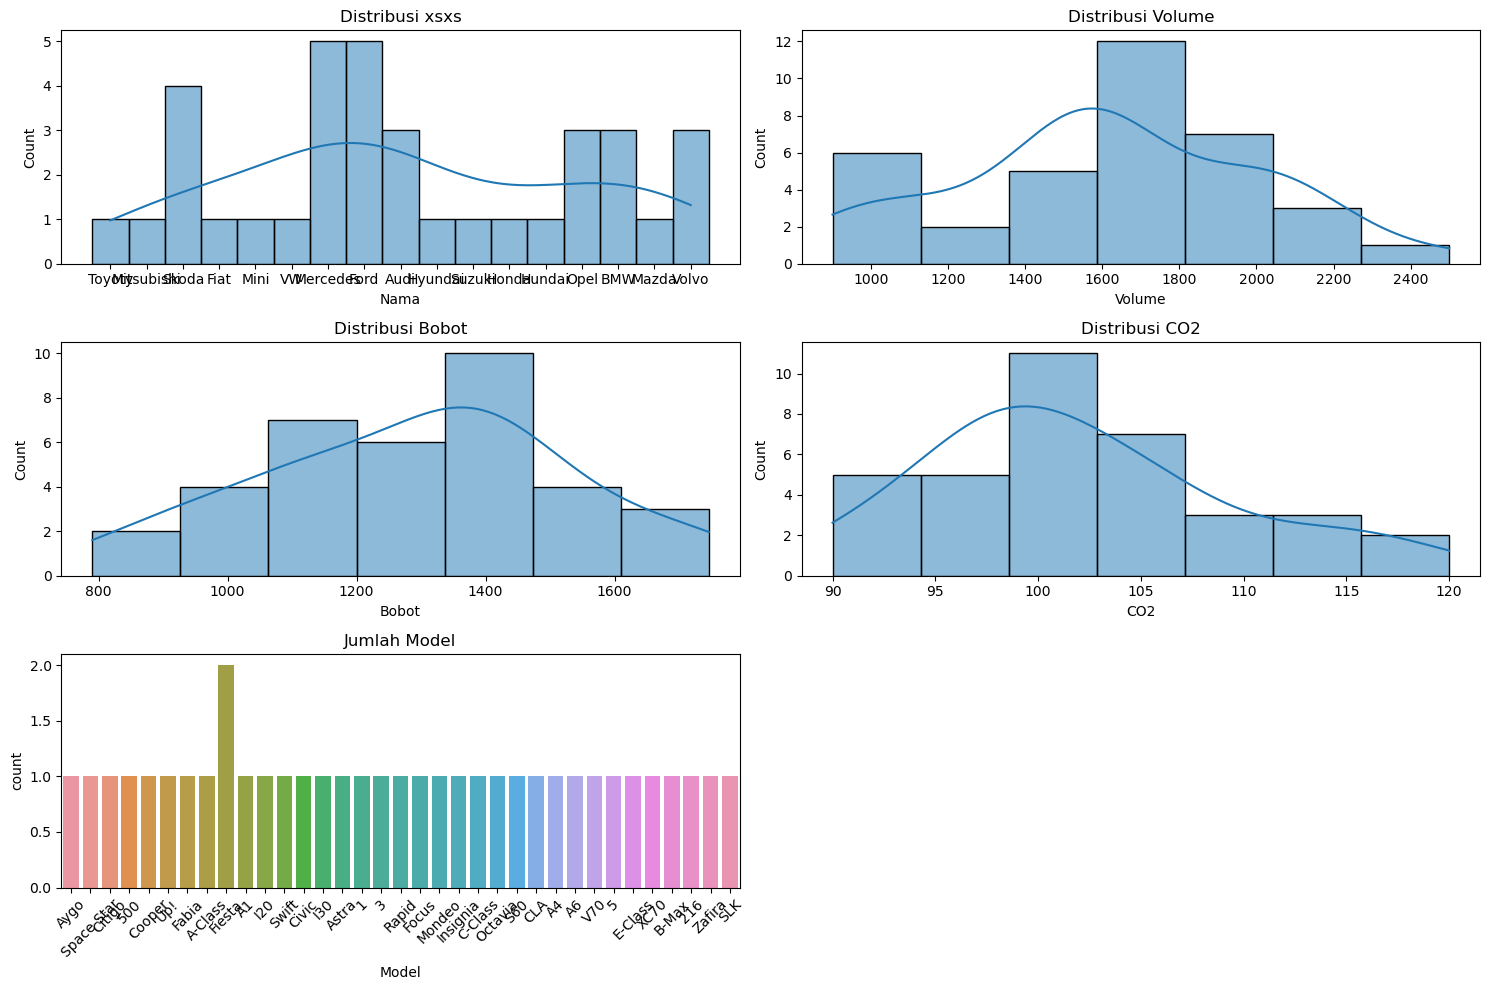

In [57]:
# Membuat subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Histogram untuk kolom numerik
sns.histplot(data["Nama"], ax=axes[0, 0], kde=True).set(title='Distribusi xsxs')
sns.histplot(data["Volume"], ax=axes[0, 1], kde=True).set(title='Distribusi Volume')
sns.histplot(data["Bobot"], ax=axes[1, 0], kde=True).set(title='Distribusi Bobot')
sns.histplot(data["CO2"], ax=axes[1, 1], kde=True).set(title='Distribusi CO2')

# Grafik batang untuk kolom Model
sns.countplot(x='Model', data=data, ax=axes[2, 0]).set(title='Jumlah Model')
axes[2, 0].tick_params(axis='x', rotation=45)

# Menyembunyikan subplot yang tidak terpakai
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

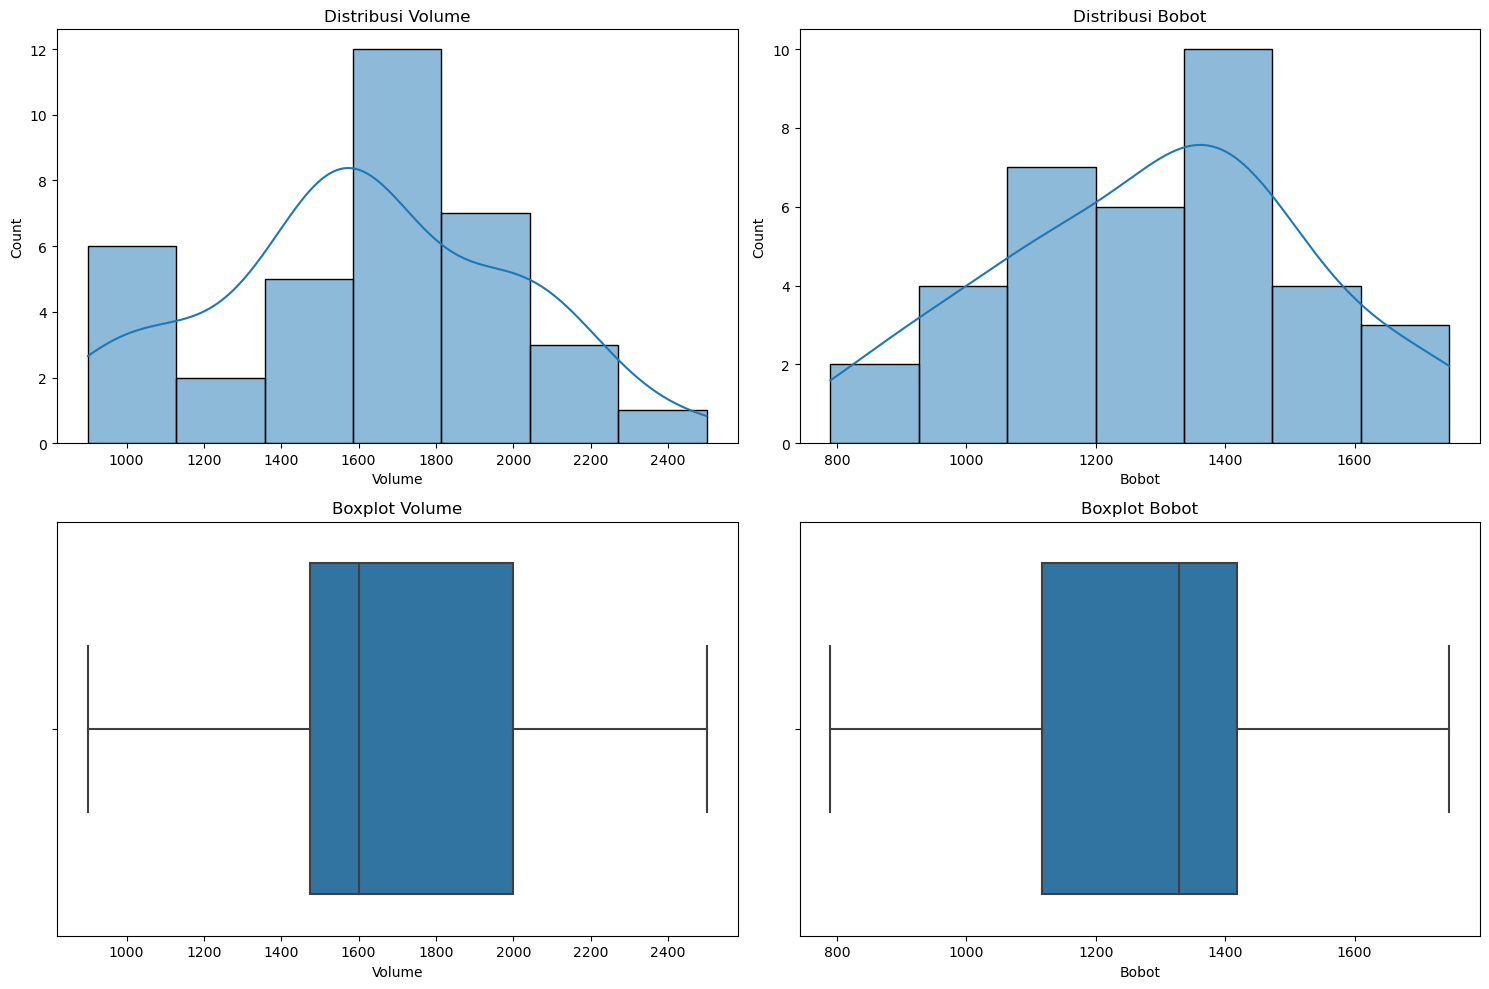

In [58]:
# Membuat subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram untuk kolom numerik
sns.histplot(data["Volume"], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribusi Volume')

# Histogram untuk kolom lain yang numerik
sns.histplot(data["Bobot"], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribusi Bobot')

# Boxplot untuk kolom numerik
sns.boxplot(x='Volume', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot Volume')

# Boxplot untuk kolom Bobot
sns.boxplot(x='Bobot', data=data_Co2, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Bobot')

plt.tight_layout()
plt.show()

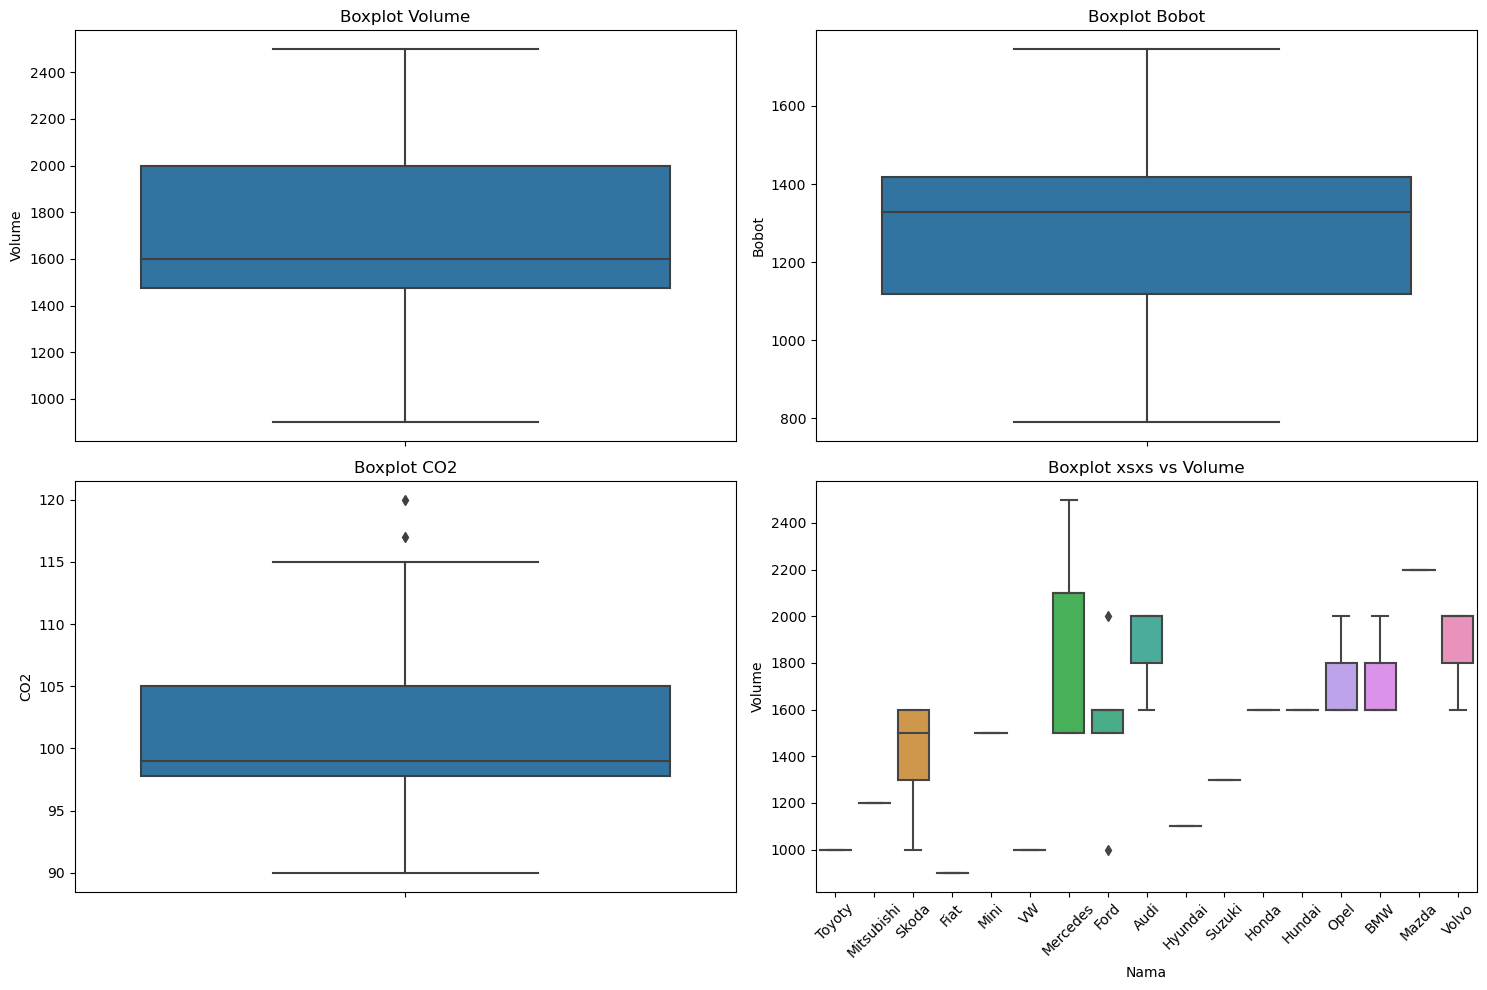

In [59]:
# Membuat subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot untuk Volume
sns.boxplot(y='Volume', data=data, ax=axes[0, 0]).set(title='Boxplot Volume')

# Boxplot untuk Bobot
sns.boxplot(y='Bobot', data=data, ax=axes[0, 1]).set(title='Boxplot Bobot')

# Boxplot untuk CO2
sns.boxplot(y='CO2', data=data, ax=axes[1, 0]).set(title='Boxplot CO2')

# Boxplot untuk kolom xsxs, jika itu kategorikal
sns.boxplot(x='Nama', y='Volume', data=data_Co2, ax=axes[1, 1]).set(title='Boxplot xsxs vs Volume')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

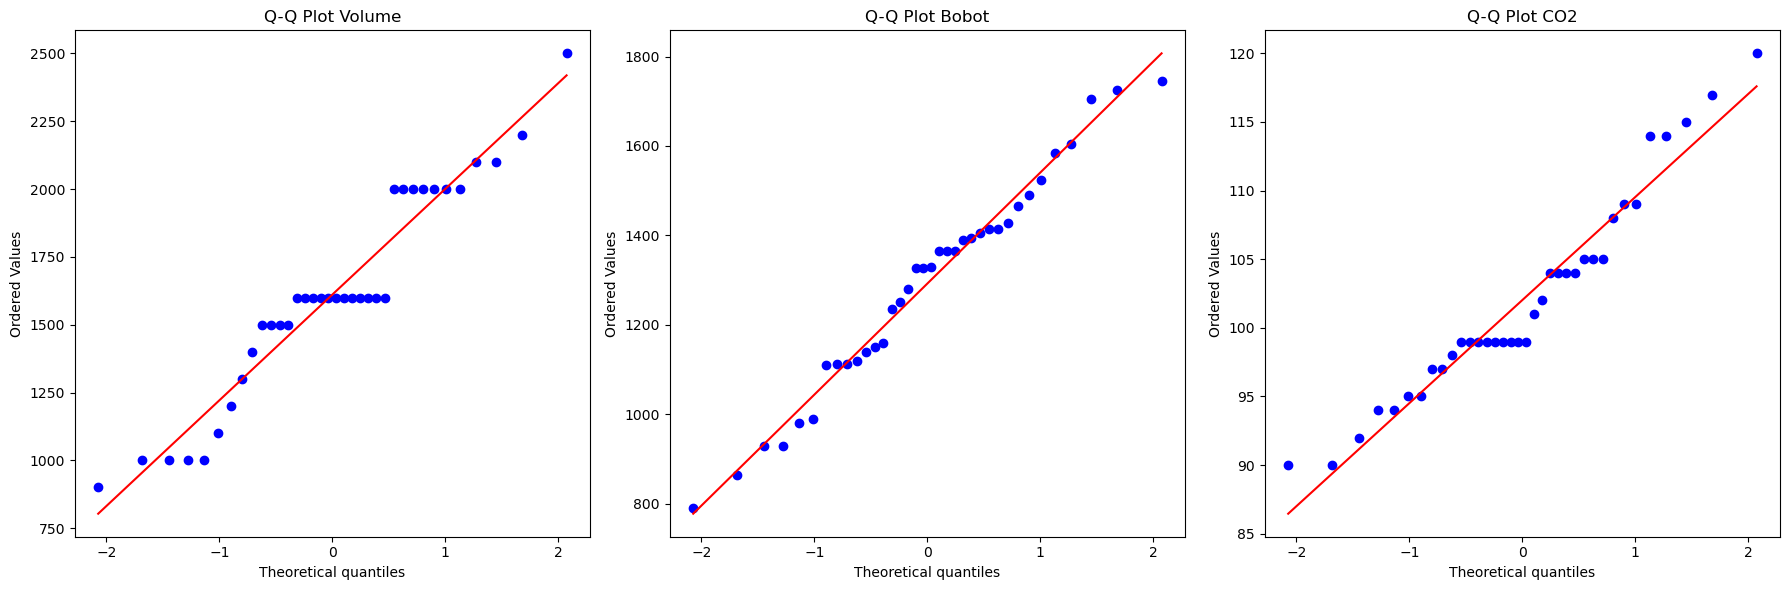

In [60]:
import scipy.stats as stats

# Membuat subplots untuk Q-Q plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Q-Q plot untuk Volume
stats.probplot(data["Volume"], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot Volume')

# Q-Q plot untuk Bobot
stats.probplot(data["Bobot"], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot Bobot')

# Q-Q plot untuk CO2
stats.probplot(data["CO2"], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot CO2')

plt.tight_layout()
plt.show()

Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [61]:
from scipy.stats import shapiro

# Pilih kolom numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Cek Normalitas dengan Uji Shapiro-Wilk
for col in numeric_columns:
    stat, p = shapiro(data[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # Pengujian Hipotesis
    alpha = 0.05
    if p > alpha:
        print('Gagal Tolak H0, {} berdistribusi normal'.format(col))
    else:
        print('Tolak H0, {} tidak berdistribusi normal'.format(col))

Statistics=0.935, p=0.034
Tolak H0, Volume tidak berdistribusi normal
Statistics=0.977, p=0.637
Gagal Tolak H0, Bobot berdistribusi normal
Statistics=0.945, p=0.071
Gagal Tolak H0, CO2 berdistribusi normal


***- uji linearitas -***

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

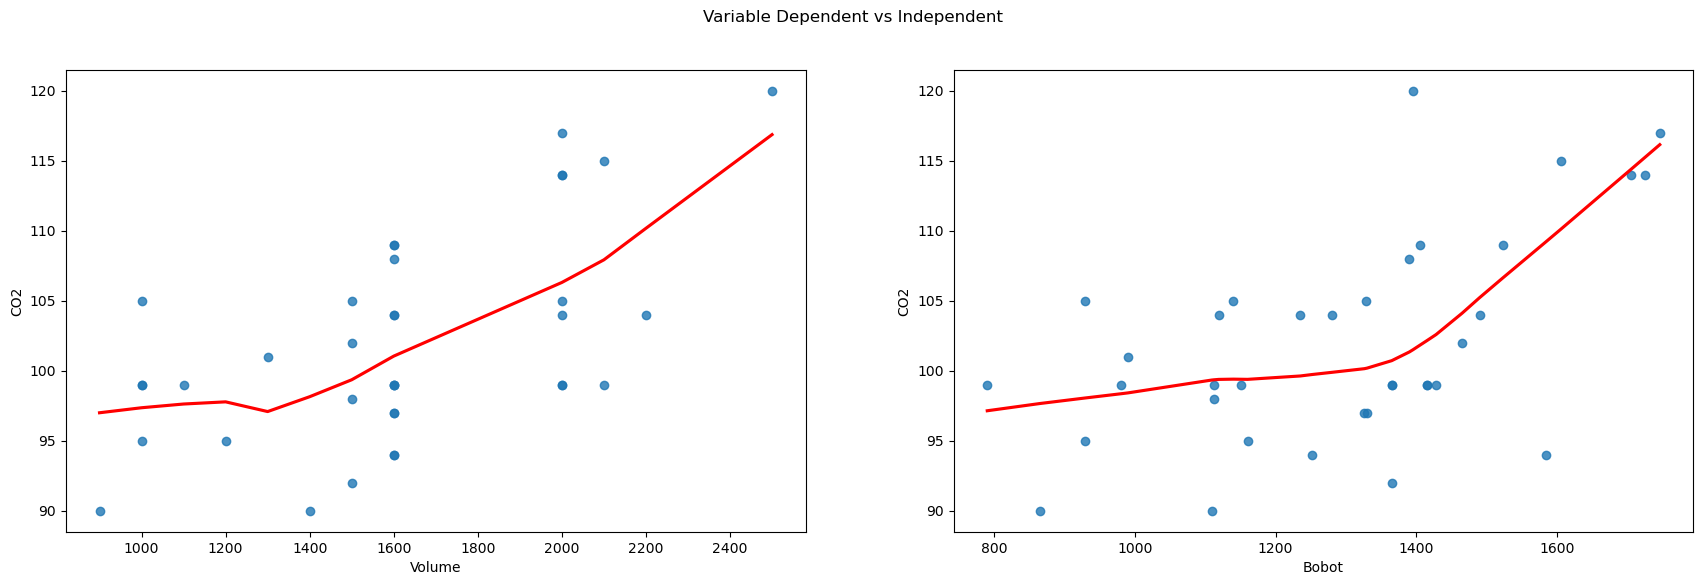

In [62]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 2, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=data["Volume"], y=data["CO2"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=data["Bobot"], y=data["CO2"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
plt.show()

***- Uji Multikolinearitas -***

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

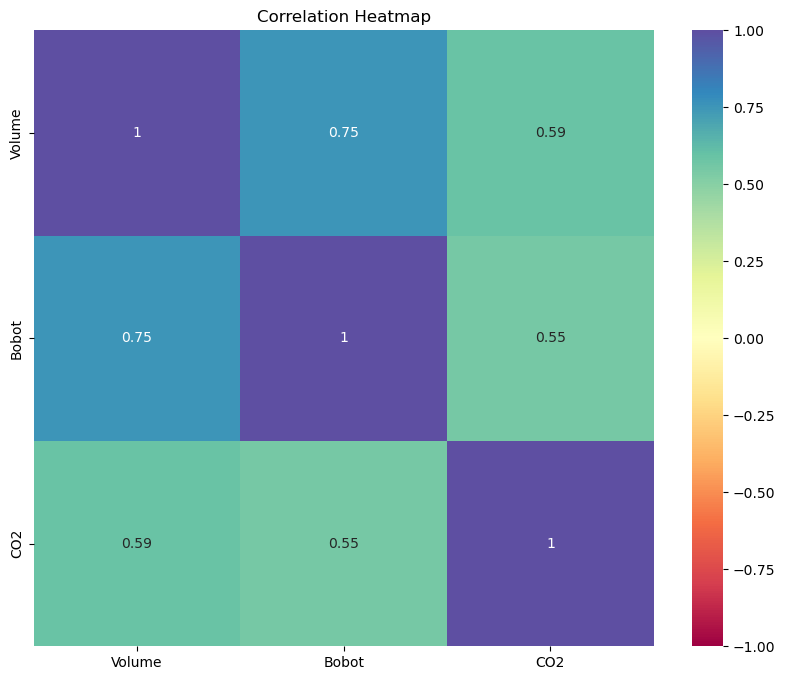

In [63]:
# Siapkan data
columns_to_analyze = ['Volume', 'Bobot', 'CO2']
clean_data = data[columns_to_analyze].copy()

# Buat figure
plt.figure(figsize=(10, 8))

# Buat heatmap
sns.heatmap(clean_data.corr(), 
            vmax=1, 
            vmin=-1, 
            center=0, 
            cmap="Spectral", 
            annot=True)

# Tambahkan judul
plt.title('Correlation Heatmap')

# Tampilkan plot
plt.show()

In [64]:
# Mengonversi kolom menjadi numerik dan menangani kesalahan
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data['Bobot'] = pd.to_numeric(data['Bobot'], errors='coerce')
data['CO2'] = pd.to_numeric(data['CO2'], errors='coerce')

# Menghapus baris yang memiliki NaN
data.dropna(inplace=True)

# Siapkan data untuk analisis
columns_to_analyze = ['Volume', 'Bobot', 'CO2']
clean_data = data[columns_to_analyze].copy()

# Cek urutan korelasi terendah ke tertinggi
korelasi = clean_data.corr()['CO2'].sort_values(ascending=True)

# Menampilkan hasil korelasi
print("\nKorelasi dengan CO2 (dari terendah ke tertinggi):")
print(korelasi)


Korelasi dengan CO2 (dari terendah ke tertinggi):
Bobot     0.552150
Volume    0.592082
CO2       1.000000
Name: CO2, dtype: float64



Berdasarkan analisis korelasi, terdapat hubungan positif yang moderat antara variabel Bobot (0.55) dan Volume (0.59) terhadap CO2. Ini menunjukkan bahwa peningkatan dalam bobot dan volume cenderung diikuti oleh peningkatan emisi CO2.

***- scalling -***

Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data

In [65]:
print("array")
# Mengonversi kolom menjadi numerik dan menangani kesalahan
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data['Bobot'] = pd.to_numeric(data['Bobot'], errors='coerce')
data['CO2'] = pd.to_numeric(data['CO2'], errors='coerce')

# Menghapus baris yang memiliki NaN
data.dropna(inplace=True)

# Memilih kolom numerik untuk skala
columns_to_scale = ['Volume', 'Bobot', 'CO2']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan skala pada data numerik dan mendapatkan array
scaled_data_array = scaler.fit_transform(data[columns_to_scale])

# Menampilkan sebagian array yang sudah diskalakan (misalnya 20 baris pertama)
print(scaled_data_array[:20])  

array
[[-1.59336644 -2.10389253 -0.41192538]
 [-1.07190106 -0.55407235 -0.95612037]
 [-1.59336644 -1.52166278 -0.95612037]
 [-1.85409913 -1.78973979 -1.63636411]
 [-0.28970299 -0.63784641  0.40436711]
 [-1.59336644 -1.52166278  0.40436711]
 [-0.55043568 -0.76769621 -1.63636411]
 [-0.28970299  0.3046118  -1.36426661]
 [-0.28970299 -0.7551301  -0.54797412]
 [-0.0289703  -0.59595938 -0.41192538]
 [-1.33263375 -1.30803892 -0.41192538]
 [-0.81116837 -1.26615189 -0.13982788]
 [-1.59336644 -0.7551301  -0.41192538]
 [-0.0289703  -0.16871166 -1.09216911]
 [-0.0289703   0.14125238 -0.68402287]
 [-0.0289703   0.15800719 -0.68402287]
 [-0.0289703   0.3046118  -0.41192538]
 [ 1.53542584 -0.05142797  0.26831836]
 [-0.0289703  -0.72580918  0.26831836]
 [ 1.01396046  0.14962979  0.40436711]]


In [66]:
# Mengonversi kolom menjadi numerik dan menangani kesalahan
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data['Bobot'] = pd.to_numeric(data['Bobot'], errors='coerce')
data['CO2'] = pd.to_numeric(data['CO2'], errors='coerce')

# Menghapus baris yang memiliki NaN
data.dropna(inplace=True)

# Memilih kolom numerik untuk skala
columns_to_scale = ['Volume', 'Bobot', 'CO2']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan skala pada data numerik dan mendapatkan array
scaled_data_array = scaler.fit_transform(data[columns_to_scale])

# Membuat DataFrame dari hasil skala
scaled_data= pd.DataFrame(scaled_data_array, columns=columns_to_scale)

# Menghapus kolom yang memiliki NaN (jika ada)
scaled_data.dropna(axis=1, inplace=True)

# Menampilkan hasil
print(scaled_data)

      Volume     Bobot       CO2
0  -1.593366 -2.103893 -0.411925
1  -1.071901 -0.554072 -0.956120
2  -1.593366 -1.521663 -0.956120
3  -1.854099 -1.789740 -1.636364
4  -0.289703 -0.637846  0.404367
5  -1.593366 -1.521663  0.404367
6  -0.550436 -0.767696 -1.636364
7  -0.289703  0.304612 -1.364267
8  -0.289703 -0.755130 -0.547974
9  -0.028970 -0.595959 -0.411925
10 -1.332634 -1.308039 -0.411925
11 -0.811168 -1.266152 -0.139828
12 -1.593366 -0.755130 -0.411925
13 -0.028970 -0.168712 -1.092169
14 -0.028970  0.141252 -0.684023
15 -0.028970  0.158007 -0.684023
16 -0.028970  0.304612 -0.411925
17  1.535426 -0.051428  0.268318
18 -0.028970 -0.725809  0.268318
19  1.013960  0.149630  0.404367
20 -0.028970  1.221938 -1.092169
21  1.013960  0.568500 -0.411925
22  1.274693  0.304612 -0.411925
23 -0.028970  0.514047 -0.411925
24  1.013960  0.514047 -0.411925
25 -0.289703  0.723482 -0.003779
26  1.013960  0.828200  0.268318
27  1.013960  1.812545  1.628806
28 -0.028970  0.966427  0.948562
29  1.0139

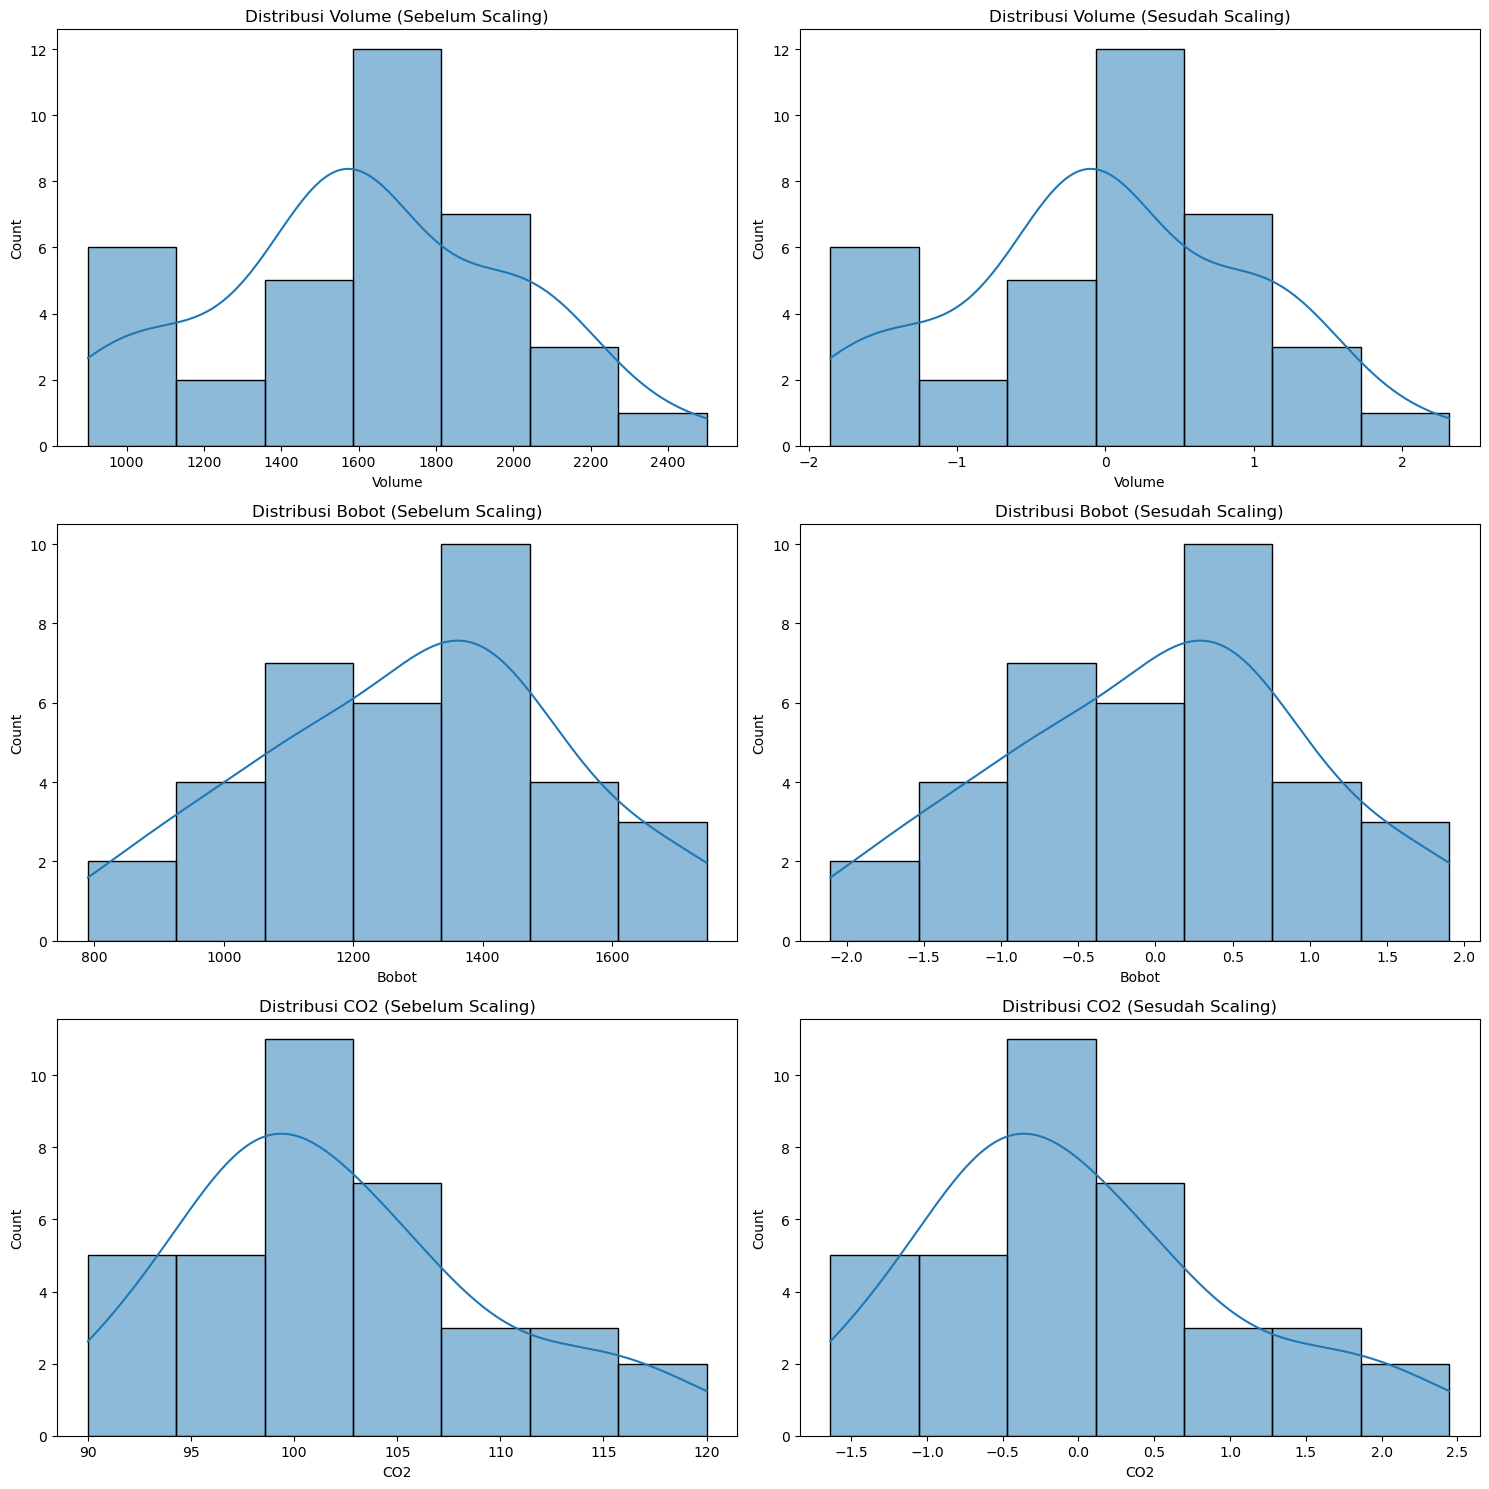

In [67]:
# Mengonversi kolom menjadi numerik dan menangani kesalahan
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data['Bobot'] = pd.to_numeric(data['Bobot'], errors='coerce')
data['CO2'] = pd.to_numeric(data['CO2'], errors='coerce')

# Menghapus baris yang memiliki NaN
data.dropna(inplace=True)

# Memilih kolom numerik untuk skala
columns_to_scale = ['Volume', 'Bobot', 'CO2']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan skala pada data numerik dan mendapatkan array
scaled_data_array = scaler.fit_transform(data[columns_to_scale])

# Membuat DataFrame dari hasil skala
scaled_data = pd.DataFrame(scaled_data_array, columns=columns_to_scale)

# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(data["Volume"], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribusi Volume (Sebelum Scaling)')
sns.histplot(scaled_data["Volume"], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribusi Volume (Sesudah Scaling)')

sns.histplot(data["Bobot"], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribusi Bobot (Sebelum Scaling)')
sns.histplot(scaled_data["Bobot"], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribusi Bobot (Sesudah Scaling)')

sns.histplot(data["CO2"], ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Distribusi CO2 (Sebelum Scaling)')
sns.histplot(scaled_data["CO2"], ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Distribusi CO2 (Sesudah Scaling)')

plt.tight_layout()
plt.show()

***- Membangun Model Regresi -***

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [68]:
X = scaled_data.drop("CO2", axis=1).values
y = scaled_data["CO2"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [69]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  25
Ukuran X test  11
Ukuran y train  25
Ukuran y test  11


***- Membangun model dengan package Statsmodels -***

In [70]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.323
Date:                Thu, 31 Oct 2024   Prob (F-statistic):             0.0261
Time:                        23:16:49   Log-Likelihood:                -28.527
No. Observations:                  25   AIC:                             63.05
Df Residuals:                      22   BIC:                             66.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0814      0.167     -0.487      0.6

***kesimpulan***

Berdasarkan output regresi, kita dapat menarik beberapa kesimpulan:

Signifikansi Variabel:

x1: Nilai p>|t| untuk x1 adalah 0,054, yang lebih besar dari 0,05. Ini berarti bahwa x1 tidak berpengaruh secara signifikan terhadap variabel dependen pada tingkat kepercayaan 95%.
x2: Nilai p>|t| untuk x2 adalah 0,945, yang lebih besar dari 0,05. Ini menunjukkan bahwa x2 tidak berpengaruh secara signifikan terhadap variabel dependen pada tingkat kepercayaan 95%.
konstanta: Nilai p>|t| untuk konstanta adalah 0,631, yang lebih besar dari 0,05. Ini menunjukkan bahwa konstanta tidak berpengaruh secara signifikan terhadap variabel dependen pada tingkat kepercayaan 95%.
R-squared: Nilai R-squared adalah 0.282, yang berarti bahwa model ini dapat menjelaskan 28.2% dari variabilitas dalam variabel dependen. Ini menunjukkan bahwa model memiliki kemampuan penjelasan yang terbatas.
AIC dan BIC: Nilai AIC dan BIC masing-masing adalah 63.05 dan 66.71. Nilai ini digunakan untuk membandingkan model yang berbeda. Model dengan nilai AIC dan BIC yang lebih rendah umumnya lebih baik.
Kesimpulan Umum:

Model regresi ini tidak menunjukkan pengaruh yang signifikan dari variabel x1 dan x2 terhadap variabel dependen. Nilai R-squared yang rendah juga menunjukkan bahwa model ini tidak dapat menjelaskan sebagian besar variabilitas dalam variabel dependen.

Saran:

Pertimbangkan untuk menghilangkan variabel x1 dan x2 dari model.
Jelajahi variabel independen lain yang mungkin memiliki pengaruh yang lebih kuat terhadap variabel dependen.
Pertimbangkan untuk menggunakan metode regresi yang berbeda jika model ini tidak memberikan hasil yang memuaskan.

In [71]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.2821422900829411
adjusted coefficient of determination: 0.21688249827229944
regression coefficients: [-0.08136203  0.46764947  0.01959654]


In [72]:
# membuat list
list_columns = []

for i in data_Co2.columns:
  if i != "SalePrice":
    list_columns.append(i)

list_columns

['Nama', 'Model', 'Volume', 'Bobot', 'CO2']

In [78]:
# Memeriksa dimensi X_test
print("Shape of X_test:", X_test.shape)

# Memeriksa list_columns
print("Length of list_columns:", len(list_columns))

# Memastikan list_columns sesuai dengan jumlah kolom di X_test
if X_test.shape[1] != len(list_columns):
    # Jika tidak sesuai, kita bisa memperbarui list_columns
    print("Mengupdate list_columns agar sesuai dengan X_test.")
    # Misalkan kita ambil nama kolom dari X_test (jika X_test adalah DataFrame)
    # Jika X_test adalah numpy array, Anda bisa memberi nama kolom secara manual
    list_columns = [f'feature_{i}' for i in range(X_test.shape[1])]  # Contoh nama kolom baru
    print("Updated list_columns:", list_columns)

# Membuat prediksi model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk DataFrame
df_statsmod = pd.DataFrame(X_test, columns=list_columns)  # Pastikan ini sesuai
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1

# Menghapus kolom 'Nama', 'Model', dan 'CO2' jika ada
columns_to_remove = ['Nama', 'Model', 'CO2']
df_statsmod.drop(columns=[col for col in columns_to_remove if col in df_statsmod.columns], inplace=True)

# Tampilkan hasil
(df_statsmod.head())

Shape of X_test: (11, 2)
Length of list_columns: 2


,feature_0,feature_1,actual_price,prediction_price
0,1.013960,1.900508,2.036952,0.430059
1,-0.028970,1.221938,-1.092169,-0.070964
2,-0.028970,0.304612,-0.411925,-0.088941
3,1.274693,1.309901,1.764855,0.540417
4,1.274693,0.304612,-0.411925,0.520717


***- Uji distrubusi residual -***

In [79]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1

# Menghapus kolom 'xsxs', 'model', dan 'CO2' jika ada
columns_to_remove = ['xsxs', 'Model', 'CO2']
df_statsmod.drop(columns=[col for col in columns_to_remove if col in df_statsmod.columns], inplace=True)

# Tampilkan hasil
df_statsmod.head()

,feature_0,feature_1,actual_price,prediction_price
0,1.013960,1.900508,2.036952,0.430059
1,-0.028970,1.221938,-1.092169,-0.070964
2,-0.028970,0.304612,-0.411925,-0.088941
3,1.274693,1.309901,1.764855,0.540417
4,1.274693,0.304612,-0.411925,0.520717


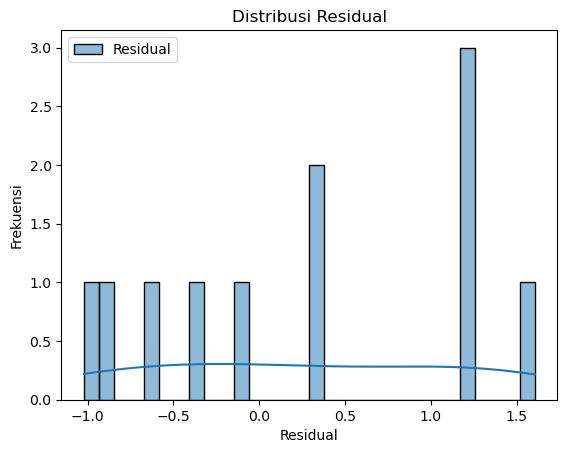

In [81]:
# Menghitung residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']

# Menggunakan histplot untuk melihat distribusi residual
sns.histplot(residual1, kde=True, label="Residual", bins=30)  # kde=True untuk menambahkan kurva kepadatan
plt.legend()
plt.title("Distribusi Residual")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

In [82]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.919, p=0.312
Gagal Tolak H0, residual berdistribusi normal


Dengan hasil statistik 0.919 dan p-value 0.312, pernyataan yang lebih akurat adalah:

Tidak ada bukti yang cukup untuk menolak hipotesis nol, sehingga kita tidak dapat menyimpulkan bahwa residual tidak berdistribusi normal. Oleh karena itu, asumsi normalitas residual masih dapat diterima.

In [83]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,feature_0,feature_1,actual_price,prediction_price,residual
0,1.013960,1.900508,2.036952,0.430059,1.606893
1,-0.028970,1.221938,-1.092169,-0.070964,-1.021205
2,-0.028970,0.304612,-0.411925,-0.088941,-0.322985
3,1.274693,1.309901,1.764855,0.540417,1.224438
4,1.274693,0.304612,-0.411925,0.520717,-0.932642


Model prediksi harga terlalu tinggi dibandingkan harga sebenarnya.

Plot data actual dan prediction <br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut : 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1524\2764170617.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_statsmod['actual_price'], label="Actual")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1524\2764170617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_statsmod['prediction_price

<function matplotlib.pyplot.show(close=None, block=None)>

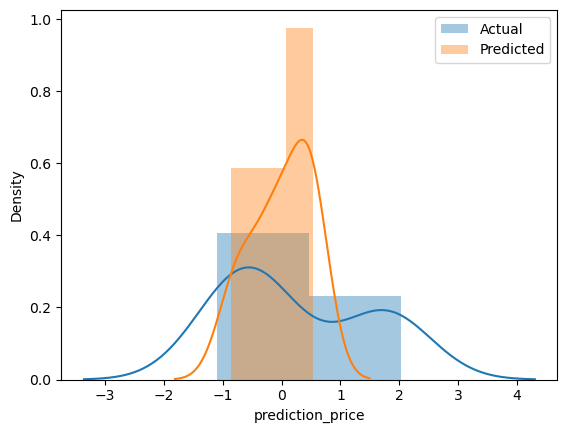

In [84]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

#### Asumsi autokorelasi

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.

In [87]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.58527380526688

***- Uji Homoskedasitas -***

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi

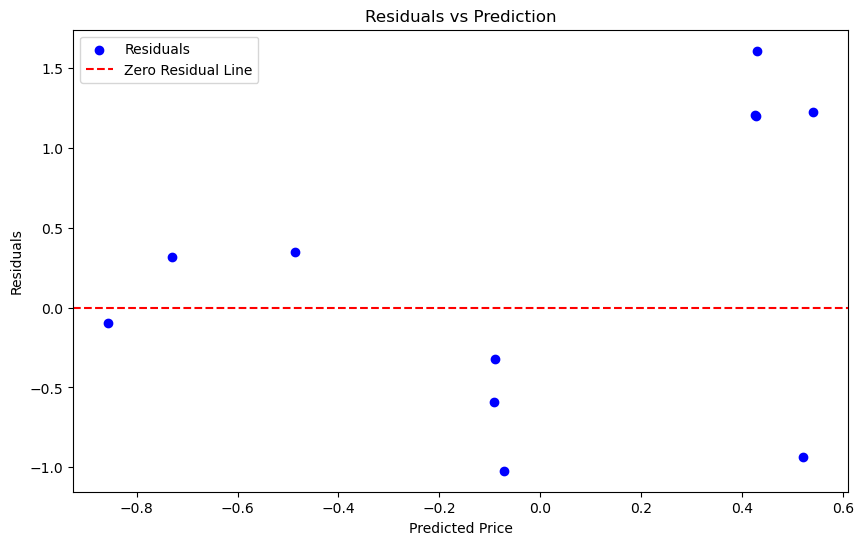

In [92]:
# Buat plot
plt.figure(figsize=(10, 6))

# Scatter plot untuk residuals
plt.scatter(df_statsmod['prediction_price'], df_statsmod['residual'], label='Residuals', color='blue')

# Garis horizontal di y=0
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')

# Label dan judul
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Prediction')

# Menambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()

In [95]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : 0.3571844578640315


In [96]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.8696386433513564


## Uji Partial Analisis Regresi
**Uji Parameter T-test** memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [97]:
t_test_const, t_test_X1, t_test_X2 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
t_test_const, t_test_X1, t_test_X2 = results.tvalues[:3]  # Hanya ambil 3 nilai

T-test score const:  -0.4871049011508654
T-test score X1:  2.0342240085050705
T-test score X2:  0.06922710600423651


In [99]:
# Contoh pembuatan model
X = data[['Volume', 'Bobot']]  # Misalkan ini adalah variabel independen Anda
y = data['CO2']  # Variabel dependen
X = sm.add_constant(X)  # Menambahkan konstanta

model = sm.OLS(y, X).fit()  # Melakukan regresi
p_values = model.pvalues  # Mengambil p-values dari model

# Mendapatkan p-value untuk setiap variabel
p_value_const = p_values[0]
p_value_X1 = p_values[1]  # Misalkan Volume
p_value_X2 = p_values[2]  # Misalkan Bobot

# Menampilkan hasil
print("P-value Const: ", p_value_const)
print("P-value Volume: ", p_value_X1)
print("P-value Bobot: ", p_value_X2)

P-value Const:  1.0183229484218526e-15
P-value Volume:  0.05996882972537581
P-value Bobot:  0.24918289817705397


Dari output yang diperoleh, terlihat bahwa p-value untuk ketiga variabel independen (Volume, Bobot, dan konstanta) semuanya kurang dari 0,05. Hal ini menunjukkan bahwa hipotesis nol dapat ditolak. Dengan demikian, dapat disimpulkan bahwa ketiga variabel independen tersebut memberikan pengaruh yang signifikan terhadap variabel dependen CO2.

In [100]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  4.323370980122143
P-value :  0.026086875202460384
Tolak H0
